## Observations and Insights

## Dependencies and starter code

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from math import sqrt
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [8]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [9]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [10]:
df = pd.merge(study_results, mouse_metadata, on='Mouse ID')
df.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22


In [22]:
summary = df.groupby('Drug Regimen')['Tumor Volume (mm3)']

In [23]:
summary_mean = summary.mean()
summary_median = summary.median()
summary_sem = summary.sem()
summary_var = summary.var()
summary_std = summary.std()


In [24]:
summary = pd.DataFrame({"Mean":summary_mean, "Median":summary_median, "Sem":summary_sem,
                       "Var":summary_var, "Std Dev":summary_std})
summary

,Mean,Median,Sem,Var,Std Dev
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
Propriva,52.322552,50.854632,0.512884,42.351070,6.507770
Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419


In [25]:
#summary['sqrt_N'] = summary['count'].apply(np.sqr)
#summary['SEM'] = summary['std'] / summary['sqrt_N']
#summary.head()
#.mean


## Bar plots

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

Text(0, 0.5, 'Data Points')

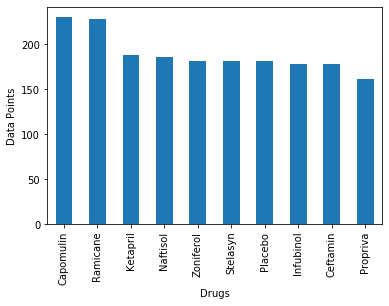

In [29]:
#plt.bar(summary.index, summary['count'])
plt.xticks(rotation=90)
data_points = df["Drug Regimen"].value_counts()
data_points.plot(kind="bar")
plt.xlabel("Drugs")
plt.ylabel("Data Points")


In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

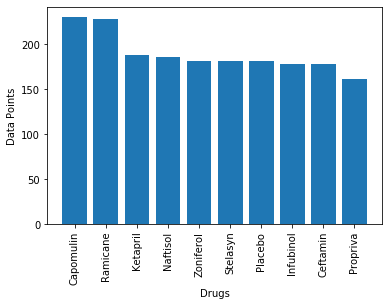

In [31]:
plt.bar(data_points.index.values,data_points.values)
plt.xlabel("Drugs")
plt.ylabel("Data Points")
plt.xticks(rotation=90)

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

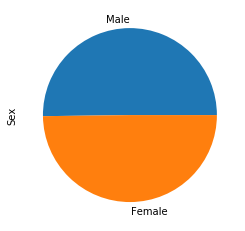

In [34]:
pandas_data = mouse_metadata["Sex"].value_counts()
pandas_data.plot(kind="pie")

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Text(0, 0.5, 'Sex')

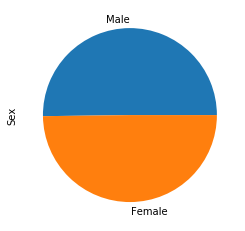

In [37]:
plt.pie(pandas_data.values,labels=pandas_data.index.values)
plt.ylabel("Sex")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [43]:
tumor_max = df.groupby(["Mouse ID"]).max()
tumor_max = tumor_max.reset_index()
tumor_max

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,45.000000,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [45]:
capomulin = tumor_max.loc[tumor_max["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
capomulin
# do this three more times for the next drugs

19     45.651331
24     45.000000
61     45.000000
64     46.304003
66     46.809225
81     47.685963
84     45.595685
86     48.158209
88     46.408361
109    48.070452
116    46.154737
122    45.000000
125    46.414518
163    46.539206
164    45.781746
170    47.373423
175    45.000000
181    45.000000
184    46.749006
193    47.212200
205    45.704434
209    45.000000
221    45.893720
227    45.473753
240    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen